IMPORT LIBRARIES 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASET

In [33]:
df = pd.read_csv("C:/Users/hp/Desktop/PRAGUN/real-estate-valuation-risk-assessment/mumbai_house_data.csv")

BASIC EXPLORATORY DATA ANALYSIS (EDA)

In [34]:
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age,expected_roi(%),demand_indicator,market_volatitlity_score,property_liquidity_index
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New,10.35,7.9,6.3,10.0
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New,9.25,7.8,7.4,10.0
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New,8.90,8.5,4.9,9.0
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New,9.96,6.1,3.4,8.9
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New,8.08,8.3,4.4,8.1


In [35]:
df.tail()

,bhk,type,locality,area,price,price_unit,region,status,age,expected_roi(%),demand_indicator,market_volatitlity_score,property_liquidity_index
76033,3,Apartment,Parinee Liva Roca,1527,7.00,Cr,Juhu,Ready to move,Unknown,11.97,7.7,6.3,9.5
76034,5,Apartment,Parinee Liva Roca,3049,12.00,Cr,Juhu,Ready to move,Unknown,9.21,7.8,3.9,9.3
76035,4,Apartment,Lodha Seaview,3313,10.00,Cr,Napeansea Road,Ready to move,Unknown,9.58,8.9,3.6,9.3
76036,2,Apartment,Hubtown Serene,1305,4.25,Cr,Bandra East,Ready to move,Unknown,8.99,6.6,5.0,9.6
76037,5,Apartment,Sunteck Signature Island,5200,25.00,Cr,Bandra Kurla Complex,Ready to move,Unknown,8.32,7.0,5.2,9.5


In [36]:
df.shape

(76038, 13)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bhk                       76038 non-null  int64  
 1   type                      76038 non-null  object 
 2   locality                  76038 non-null  object 
 3   area                      76038 non-null  int64  
 4   price                     76038 non-null  float64
 5   price_unit                76038 non-null  object 
 6   region                    76038 non-null  object 
 7   status                    76038 non-null  object 
 8   age                       76038 non-null  object 
 9   expected_roi(%)           76038 non-null  float64
 10  demand_indicator          76038 non-null  float64
 11  market_volatitlity_score  76038 non-null  float64
 12  property_liquidity_index  76038 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 7.5+ MB


In [38]:
df.describe()

,bhk,area,price,expected_roi(%),demand_indicator,market_volatitlity_score,property_liquidity_index
count,76038.000000,76038.000000,76038.00000,76038.000000,76038.000000,76038.000000,76038.000000
mean,2.015111,1024.536850,29.38227,9.610755,7.986348,5.505142,9.297357
std,0.922754,670.276165,32.90345,1.520605,0.977044,1.205593,0.749425
min,1.000000,127.000000,1.00000,3.310000,3.500000,1.000000,4.800000
25%,1.000000,640.000000,1.75000,8.580000,7.300000,4.700000,8.800000
50%,2.000000,872.000000,5.50000,9.610000,8.000000,5.500000,9.500000
75%,3.000000,1179.000000,59.00000,10.630000,8.700000,6.300000,10.000000
max,10.000000,16000.000000,99.99000,15.000000,10.000000,10.000000,10.000000


DATA CLEANING & PREPROCESSING

In [39]:
df.isnull().sum()

bhk                         0
type                        0
locality                    0
area                        0
price                       0
price_unit                  0
region                      0
status                      0
age                         0
expected_roi(%)             0
demand_indicator            0
market_volatitlity_score    0
property_liquidity_index    0
dtype: int64

In [40]:
df.duplicated().mean()

0.0

In [41]:
#combine price and price_unit
df['total_price']= df['price'].astype(str) + '' + df['price_unit']
df.head(2)

,bhk,type,locality,area,price,price_unit,region,status,age,expected_roi(%),demand_indicator,market_volatitlity_score,property_liquidity_index,total_price
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New,10.35,7.9,6.3,10.0,2.5Cr
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New,9.25,7.8,7.4,10.0,52.51L


In [42]:
#convert to Lakhs
conversion = {'L':1, 'Cr':100}
df['price_in_lakhs']= df['price']*df['price_unit'].map(conversion)

#drop unnecessary columns
df.drop(['price', 'price_unit', 'total_price'], axis=1, inplace=True)

df.head()

,bhk,type,locality,area,region,status,age,expected_roi(%),demand_indicator,market_volatitlity_score,property_liquidity_index,price_in_lakhs
0,3,Apartment,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,10.35,7.9,6.3,10.0,250.00
1,2,Apartment,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,9.25,7.8,7.4,10.0,52.51
2,2,Apartment,Romell Serene,610,Borivali West,Under Construction,New,8.90,8.5,4.9,9.0,173.00
3,2,Apartment,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,9.96,6.1,3.4,8.9,59.98
4,2,Apartment,Origin Oriana,659,Mira Road East,Under Construction,New,8.08,8.3,4.4,8.1,94.11


In [43]:
# Save final cleaned data
df.to_csv("mumbai_house_data_cleaned.csv", index=False)
print("Cleaned CSV saved as 'mumbai_house_data_cleaned.csv'")

Cleaned CSV saved as 'mumbai_house_data_cleaned.csv'


EDA

In [44]:
df.shape

(76038, 12)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   bhk                       76038 non-null  int64  
 1   type                      76038 non-null  object 
 2   locality                  76038 non-null  object 
 3   area                      76038 non-null  int64  
 4   region                    76038 non-null  object 
 5   status                    76038 non-null  object 
 6   age                       76038 non-null  object 
 7   expected_roi(%)           76038 non-null  float64
 8   demand_indicator          76038 non-null  float64
 9   market_volatitlity_score  76038 non-null  float64
 10  property_liquidity_index  76038 non-null  float64
 11  price_in_lakhs            76038 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 7.0+ MB


In [46]:
df['type'].unique()

array(['Apartment', 'Villa', 'Studio Apartment', 'Independent House',
       'Penthouse'], dtype=object)

In [47]:
df.bhk.value_counts()

bhk
2     31429
1     24613
3     15273
4      3934
5       606
6       148
7        16
8         8
10        6
9         5
Name: count, dtype: int64

In [48]:
df.locality.value_counts()

locality
Hiranandani Meadows                    861
Sheth Avalon                           516
T Bhimjyani The Verraton               499
ACME Ozone Phase 2                     467
Runwal Gardens                         389
                                      ... 
HP Anton CHSL Rishab Anton               1
Reputed Builder Shankar Heritage         1
Reputed Builder Aishwarya Apartment      1
Reputed Builder Vinit Tower              1
Hubtown Serene                           1
Name: count, Length: 9782, dtype: int64

In [49]:
df.area.value_counts()

area
650     1662
1050    1381
1100    1151
1650    1041
750      950
        ... 
2369       1
1945       1
1442       1
2672       1
3049       1
Name: count, Length: 2331, dtype: int64

In [50]:
df.region.value_counts()

region
Thane West         14868
Mira Road East      9902
Dombivali           3041
Kandivali East      2568
Kharghar            2362
                   ...  
Police Colony          1
GTB Nagar              1
Bandra                 1
Sector 14 Vashi        1
Goregaon               1
Name: count, Length: 228, dtype: int64

In [51]:
df.status.value_counts()

status
Ready to move         44982
Under Construction    31056
Name: count, dtype: int64

In [52]:
df.age.value_counts()

age
New        38072
Resale     23357
Unknown    14609
Name: count, dtype: int64

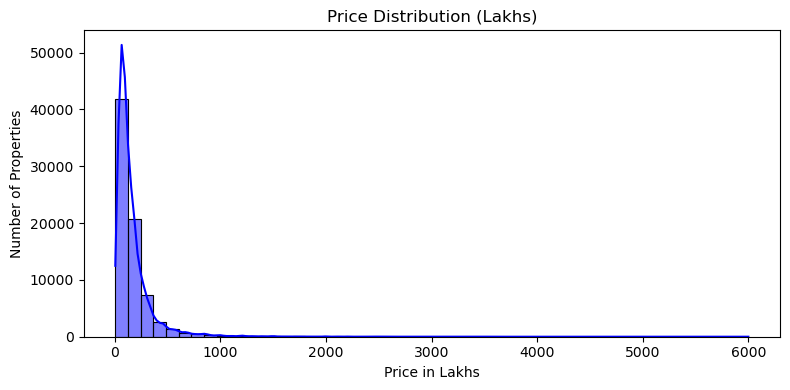

In [53]:
# price distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['price_in_lakhs'], bins=50, kde=True, color='blue')
plt.title("Price Distribution (Lakhs)")
plt.xlabel("Price in Lakhs")
plt.ylabel("Number of Properties")
plt.tight_layout()
plt.show()


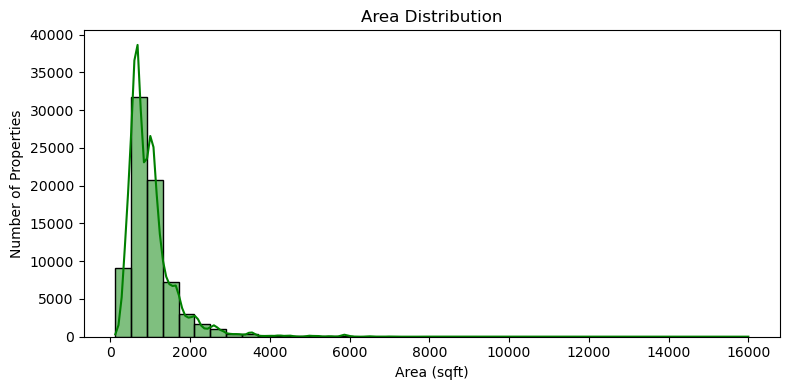

In [54]:
# Area Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['area'], bins = 40, kde=True, color='green')
plt.title("Area Distribution")
plt.xlabel("Area (sqft)")
plt.ylabel("Number of Properties")
plt.tight_layout()
plt.show()

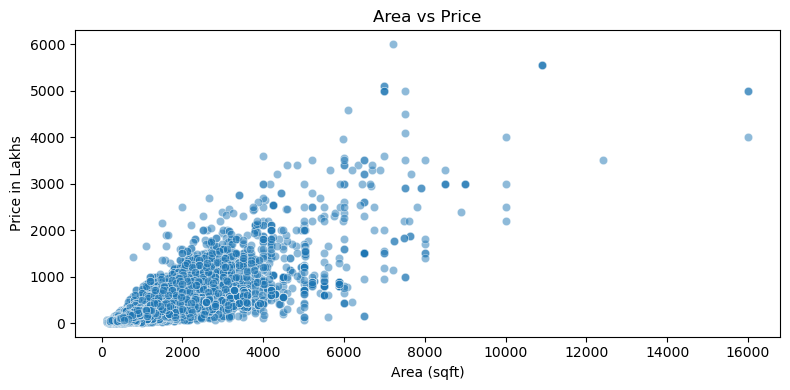

In [55]:
#area vs price
plt.figure(figsize=(8, 4))
sns.scatterplot(x='area', y='price_in_lakhs', data=df, alpha=0.5)
plt.title("Area vs Price")
plt.xlabel("Area (sqft)")
plt.ylabel("Price in Lakhs")
plt.tight_layout()
plt.show()


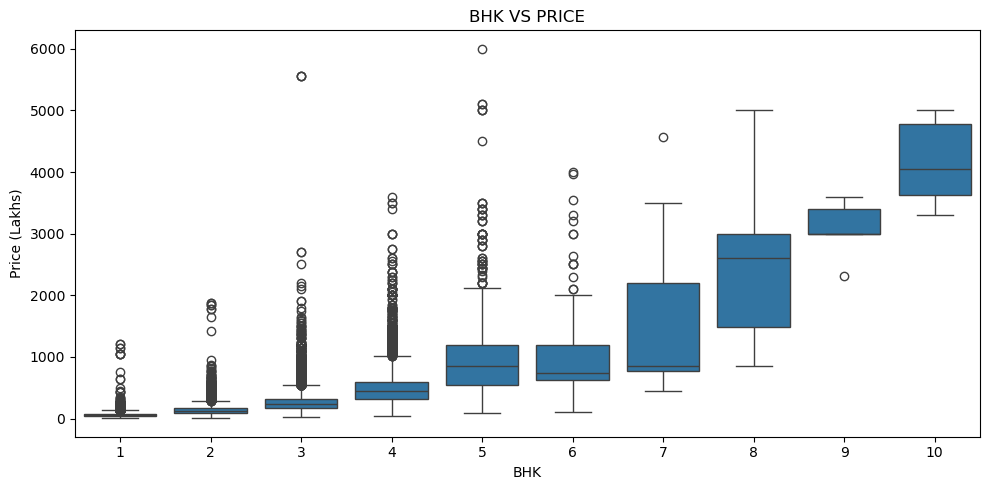

In [56]:
#BHK VS Price
plt.figure(figsize=(10,5))
sns.boxplot(x='bhk', y='price_in_lakhs', data=df)
plt.title('BHK VS PRICE')
plt.xlabel('BHK')
plt.ylabel('Price (Lakhs)')
plt.tight_layout()
plt.show()

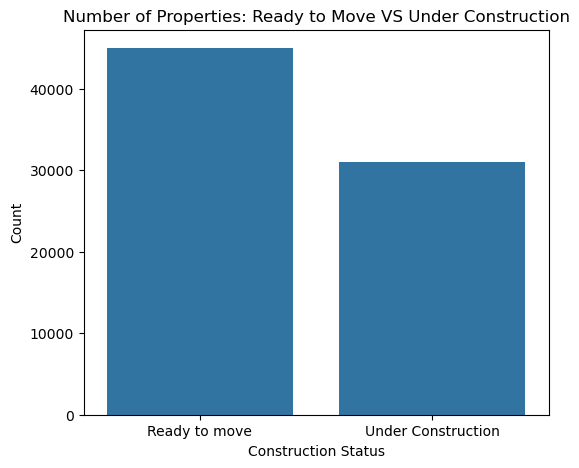

In [57]:
# status (ready to move VS under construction)
plt.figure(figsize=(6,5))
sns.countplot(x='status', data=df)
plt.title('Number of Properties: Ready to Move VS Under Construction')
plt.xlabel('Construction Status')
plt.ylabel('Count')
plt.show()

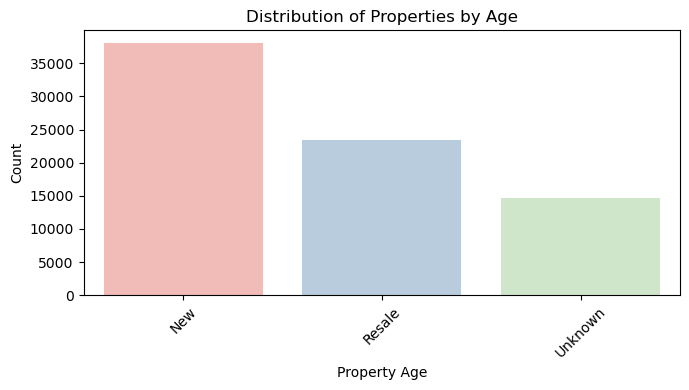

In [58]:
# Countplot: Distribution of Property by Age
plt.figure(figsize=(7, 4))
sns.countplot(x='age', hue='age', data=df, palette='Pastel1', legend=False)
plt.title("Distribution of Properties by Age")
plt.xlabel("Property Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

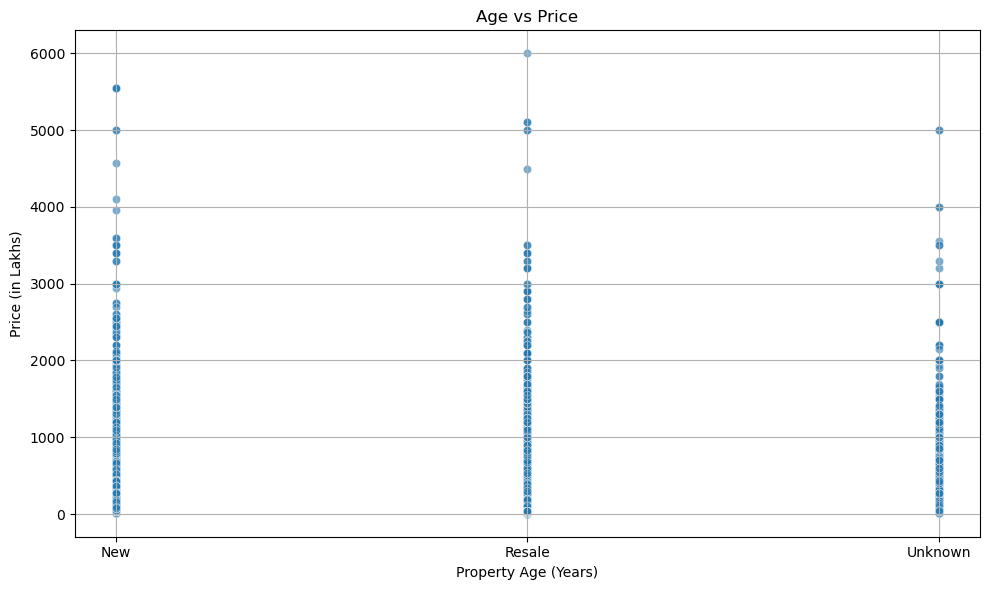

In [59]:
#Age VS Price in Lakhs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='price_in_lakhs', data=df, alpha=0.6)

plt.title('Age vs Price')
plt.xlabel('Property Age (Years)')
plt.ylabel('Price (in Lakhs)')
plt.grid(True) 
plt.tight_layout()

plt.show()

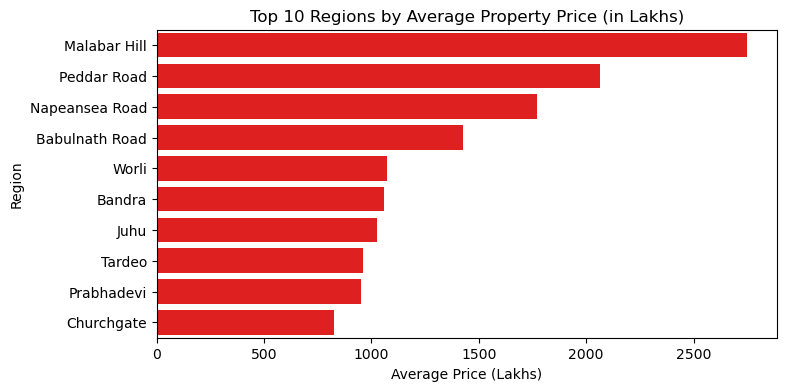

In [60]:
# Group by regions and get average price
avg_price_region = df.groupby('region')['price_in_lakhs'].mean().sort_values(ascending=False).head(10)

# Convert to DataFrame for plotting
avg_price_region_df = avg_price_region.reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x='price_in_lakhs', 
            y='region', 
            data=avg_price_region_df, 
            color = 'red')
plt.title('Top 10 Regions by Average Property Price (in Lakhs)')
plt.xlabel('Average Price (Lakhs)')
plt.ylabel('Region')
plt.show()


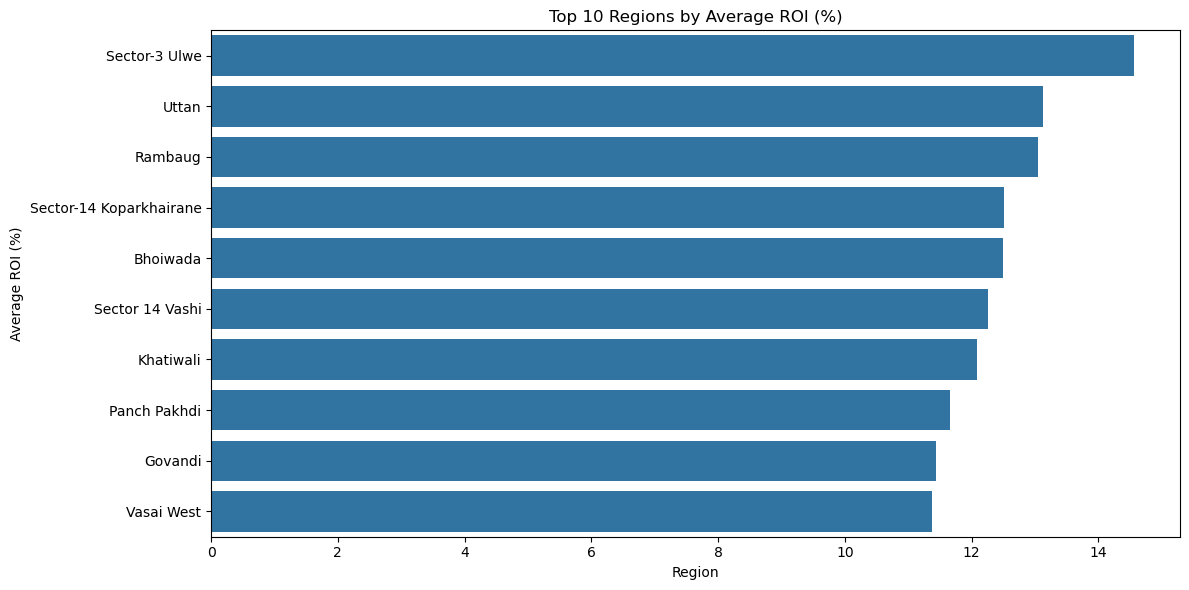

In [61]:
# Calculate average ROI per region
top10_roi = df.groupby('region')['expected_roi(%)'].mean().sort_values(ascending=False).head(10)

# Plot 
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_roi.values, y=top10_roi.index)
plt.title("Top 10 Regions by Average ROI (%)")
plt.xlabel("Region")
plt.ylabel("Average ROI (%)")
plt.tight_layout()
plt.show()


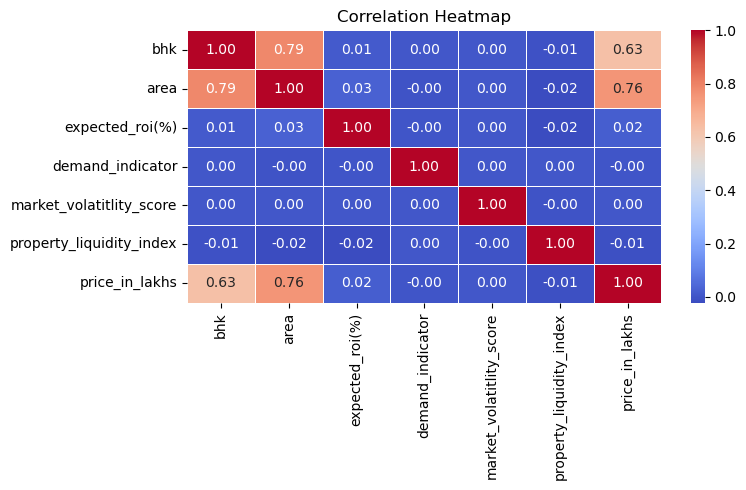

In [62]:
#Correlation Heatmap (for numerical features)
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
